In [257]:
import os
import numpy as np
import music21 as m21
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy import stats
import time
from IPython.display import display

np.random.seed(777)
plt.rcParams.update({'font.size': 17})

In [299]:
def replace_verbose_name(verbose_name):
    verbose_name = verbose_name.replace("MIDI_Grammar_SOLO_LEN12", "GSOLO")
    verbose_name = verbose_name.replace("MIDI_Grammar_TRADE", "TRADE")
    return verbose_name

In [300]:
all_similarities_store = {}
with open('./CCEvaluation_groups.json') as json_file:
    all_similarities_store = json.load(json_file)

# Analysis 1 - 2D Plane

## 2D Plane OPTION 1 
 * Y axis - Test Artists (Average of Charlie Parker & Miles Davis Grammars Len12)
 * X axis - Caleb Rascon Corpus

## 2D Plane OPTION 2
 * Y axis - Test Artists (Average of Charlie Parker & Miles Davis Grammars Len12)
 * X axis - Caleb Rascon Grammar Len12

### Axis Y values

In [301]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [302]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [303]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [304]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

CalebRascon_CORPUS
0.673728813559322 0.7649571884759798
CalebRascon_CORPUS
0.7774912768091767 0.7960848146052785
CalebRascon_CORPUS
0.6744540597889088 0.7995881458922868
CalebRascon_CORPUS
0.6604006163328197 0.7443088746183809
CalebRascon_CORPUS
0.6449834064240844 0.782654786873652
MilesDavis_GSOLO
0.7742342940234631 0.8015526152952639
MilesDavis_GSOLO
0.7544151867052931 0.7807875264270614
MilesDavis_GSOLO
0.7689060092449923 0.7670454545454545
MilesDavis_GSOLO
0.764944654353501 0.7337183519826742
MilesDavis_GSOLO
0.7647361133025067 0.8262071298108107
CharlieParker_GSOLO
0.8214285714285715 0.7234730848861284
CharlieParker_GSOLO
0.7857142857142858 0.7113095238095237
CharlieParker_GSOLO
0.8260869565217392 0.7364130434782609
CharlieParker_GSOLO
0.7118644067796611 0.7294254658385093
CharlieParker_GSOLO
0.8028571428571428 0.7269668737060042
CalebRascon_TRADE_Miles
0.7323955520028278 0.6983454457287934
CalebRascon_TRADE_Miles
0.6704302981547843 0.7446808510638298
CalebRascon_TRADE_Miles
0.797

Text(0, 0.5, 'Distance to Reference Styles')

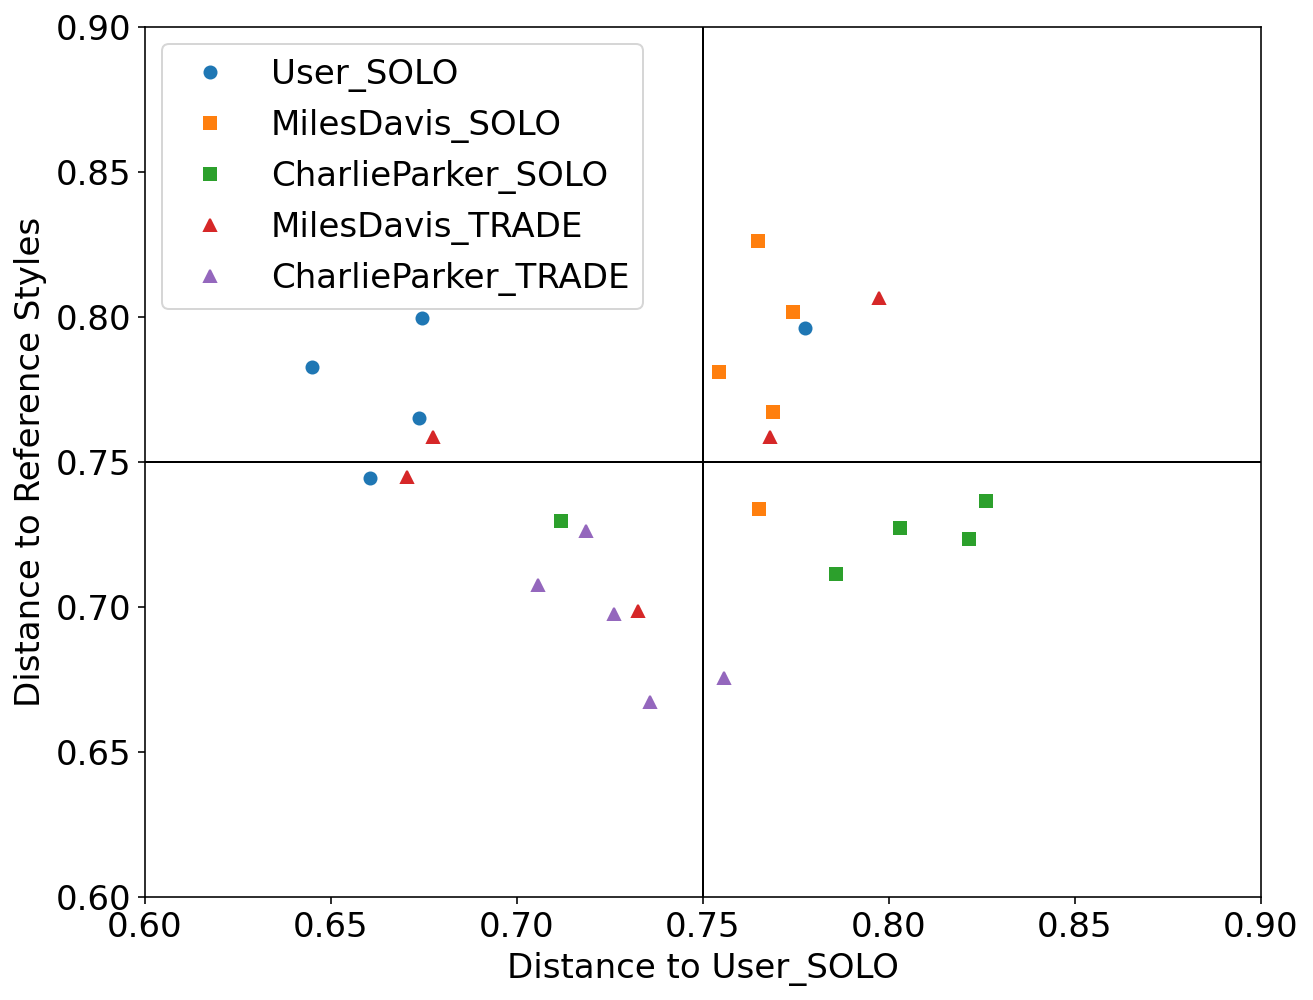

In [305]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(0.6, 0.9);
plt.ylim(0.6, 0.9);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])):
        print(keyname_i)
        print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(axis_X[keyname_i][i])
        current_Y_values.append(axis_Y[keyname_i][i])
        
    keyname_i = keyname_i.replace("CalebRascon", "User")
    keyname_i = keyname_i.replace("CORPUS", "SOLO")
    keyname_i = keyname_i.replace("GSOLO", "SOLO")
    keyname_i = keyname_i.replace("User_TRADE_Miles", "MilesDavis_TRADE")
    keyname_i = keyname_i.replace("User_TRADE_CharlieParker", "CharlieParker_TRADE")
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([0.75, 0.75], [0.6, 0.9], 'k-', lw=1)
plt.plot([0.6, 0.9], [0.75, 0.75], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("Distance to User_SOLO")
plt.ylabel("Distance to Reference Styles")

# Analysis 2 - Bar plot

## Bar plot
 * Y axis - Average Similarity
 * X axis - Same Artist, Distinct Artists, Trade Between artists

### Same Artist

In [265]:
same_artist = []
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    # We skip non GSOLO 
    if "GSOLO" not in directory_A and "CORPUS" not in directory_A:
        continue
    if "CalebRascon_GSOLO" == directory_A:
        continue
    if "GSOLO" not in directory_B and "CORPUS" not in directory_B:
        continue
    if "CalebRascon_GSOLO" == directory_B:
        continue
        
    if not (directory_A == directory_B):
        continue
    print(directory_A + " , " + directory_B)
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    same_artist.append(np.mean(current_sim_df.mean()))
same_artist

CalebRascon_CORPUS , CalebRascon_CORPUS
MilesDavis_GSOLO , MilesDavis_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO


[0.6862116345828623, 0.781862215612253, 0.7255175983436853]

In [266]:
same_artist_avg = np.mean(same_artist)
same_artist_avg

0.7311971495129335

### Different Artist

In [267]:
diff_artist = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    # We skip non GSOLO 
    if "GSOLO" not in directory_A and "CORPUS" not in directory_A:
        continue
    if "CalebRascon_GSOLO" == directory_A:
        continue
    if "GSOLO" not in directory_B and "CORPUS" not in directory_B:
        continue
    if "CalebRascon_GSOLO" == directory_B:
        continue
        
    if (directory_A == directory_B):
        continue
    print(directory_A + " , " + directory_B)
    if (directory_B not in diff_artist):
        diff_artist[directory_B] = []
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    diff_artist[directory_B].append(np.mean(current_sim_df.mean()))
diff_artist

CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , MilesDavis_GSOLO


{'MilesDavis_GSOLO': [0.7654472515259512, 0.8282969435379162],
 'CharlieParker_GSOLO': [0.7895902726602801, 0.8282969435379162],
 'CalebRascon_CORPUS': [0.7654472515259512, 0.78959027266028]}

In [268]:
diff_artist_avg_list = []
for keyname_diff in diff_artist:
    diff_artist_avg_list.append(np.mean(diff_artist[keyname_diff]))
diff_artist_avg_list

[0.7968720975319337, 0.8089436080990982, 0.7775187620931157]

In [269]:
diff_artist_avg = np.mean(diff_artist_avg_list)
diff_artist_avg

0.7944448225747158

### Trades

In [270]:
trades_artists = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    # We skip non GSOLO in A
    if "GSOLO" not in directory_A and "CORPUS" not in directory_A:
        continue
    if "CalebRascon_GSOLO" == directory_A:
        continue
    
    # We skip non TRADE in B
    if "TRADE" not in directory_B:
        continue
    if "CalebRascon_TRADE_Caleb" == directory_B:
        continue
    
    trading_from = directory_B.split("_")[0]
    trading_with = directory_B.split("_")[2]
    if (trading_with not in directory_A) and (trading_from not in directory_A):
        continue
    
    print(directory_A + " , " + directory_B)
    if (directory_B not in trades_artists):
        trades_artists[directory_B] = []
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    trades_artists[directory_B].append(np.mean(current_sim_df.mean()))
trades_artists

CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


{'CalebRascon_TRADE_Miles': [0.7291504522500383, 0.7532848736554631],
 'CalebRascon_TRADE_CharlieParker': [0.7283740448712199, 0.6947068606312036]}

In [271]:
trades_artists_avg_list = []
for keyname_trade in trades_artists:
    trades_artists_avg_list.append(np.mean(trades_artists[keyname_trade]))
trades_artists_avg_list

[0.7412176629527507, 0.7115404527512117]

In [272]:
trades_artists_avg = np.mean(trades_artists_avg_list)
trades_artists_avg

0.7263790578519812

Text(0, 0.5, 'Similarity Avg')

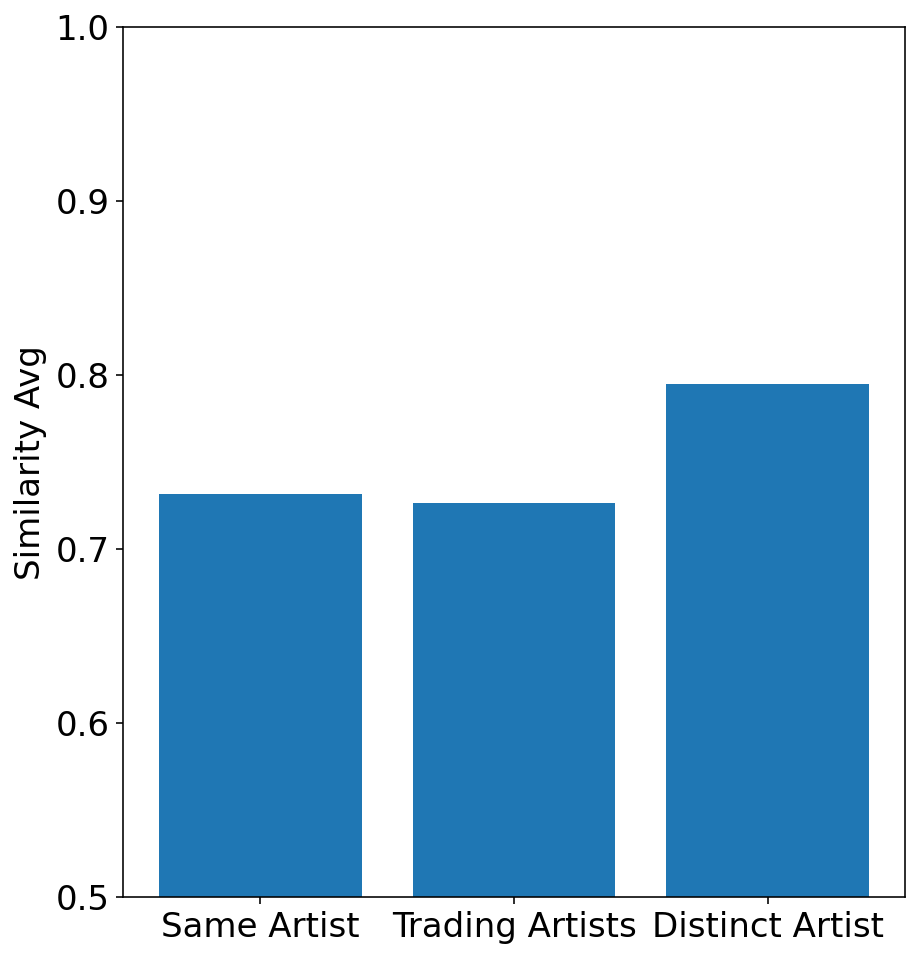

In [273]:
labels = ['Same Artist', 'Trading Artists', 'Distinct Artist']
values = [same_artist_avg, trades_artists_avg, diff_artist_avg]
fig, ax = plt.subplots(figsize=(7,8))

ax.bar(labels,values)
ax.set_ylim(0.5,1.0)
ax.set_ylabel("Similarity Avg")

# Analysis 3 - 2D Plane For Comparison with Local Alignment

In [274]:
all_similarities_store = {}
with open('./CCEvaluation_groups_LA.json') as json_file:
    all_similarities_store = json.load(json_file)

### Axis Y values

In [275]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [276]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [277]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [278]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

Text(0, 0.5, 'Distance to Reference Styles')

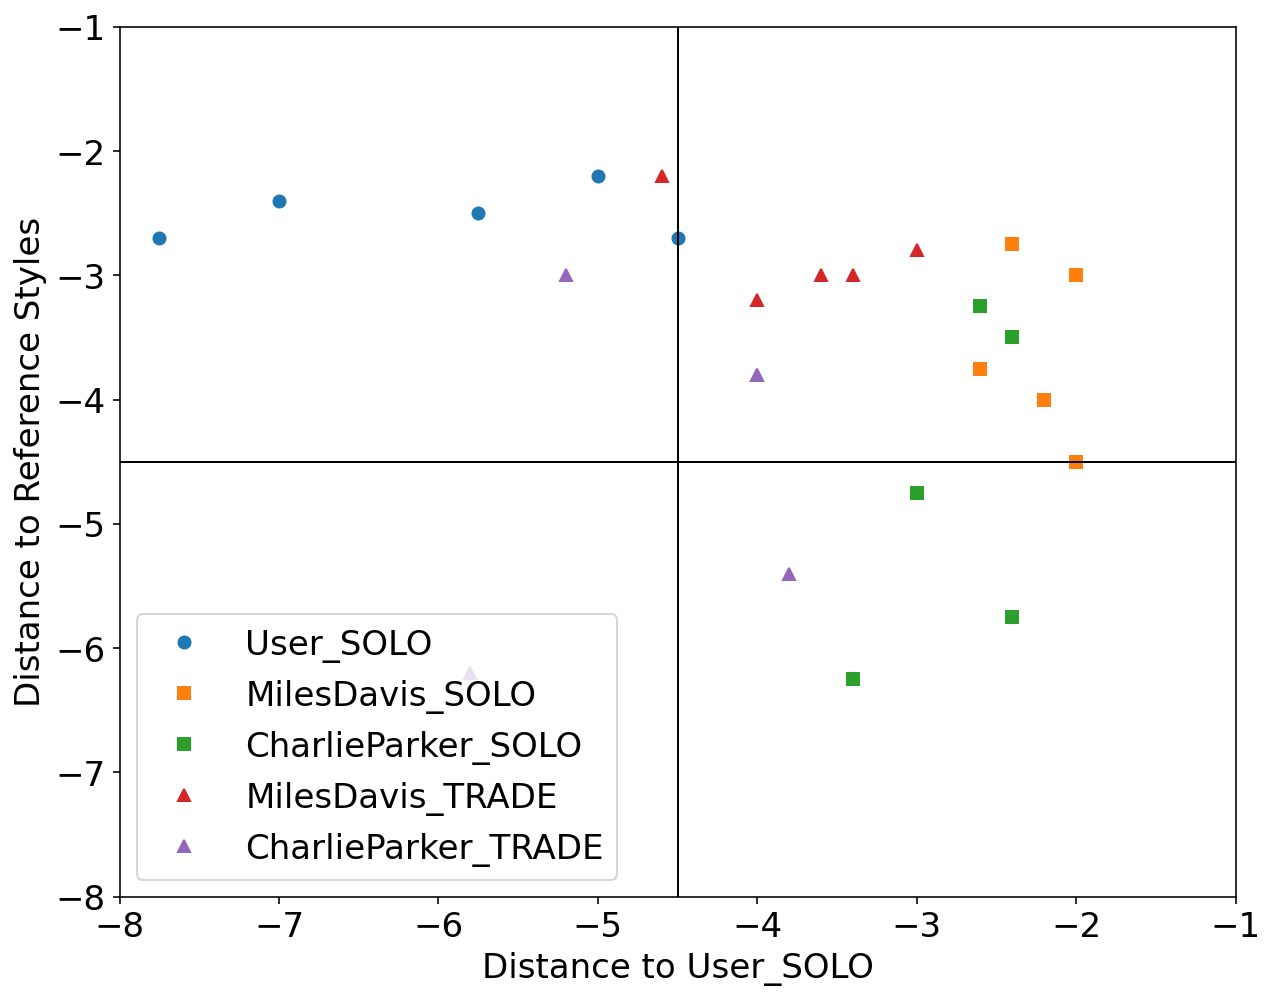

In [279]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(-8, -1);
plt.ylim(-8, -1);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])): 
        # print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(axis_X[keyname_i][i])
        current_Y_values.append(axis_Y[keyname_i][i])
        
    keyname_i = keyname_i.replace("CalebRascon", "User")
    keyname_i = keyname_i.replace("CORPUS", "SOLO")
    keyname_i = keyname_i.replace("GSOLO", "SOLO")
    keyname_i = keyname_i.replace("User_TRADE_Miles", "MilesDavis_TRADE")
    keyname_i = keyname_i.replace("User_TRADE_CharlieParker", "CharlieParker_TRADE")
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([-4.5, -4.5], [-1, -8], 'k-', lw=1)
plt.plot([-1, -8], [-4.5, -4.5], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("Distance to User_SOLO")
plt.ylabel("Distance to Reference Styles")

# Analysis 4 - 2D Plane For Comparison with Euclidean Distance

In [280]:
all_similarities_store = {}
with open('./CCEvaluation_groups_ED.json') as json_file:
    all_similarities_store = json.load(json_file)

### Axis Y values

In [281]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [282]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [283]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [284]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

Text(0, 0.5, 'Distance to Reference Styles')

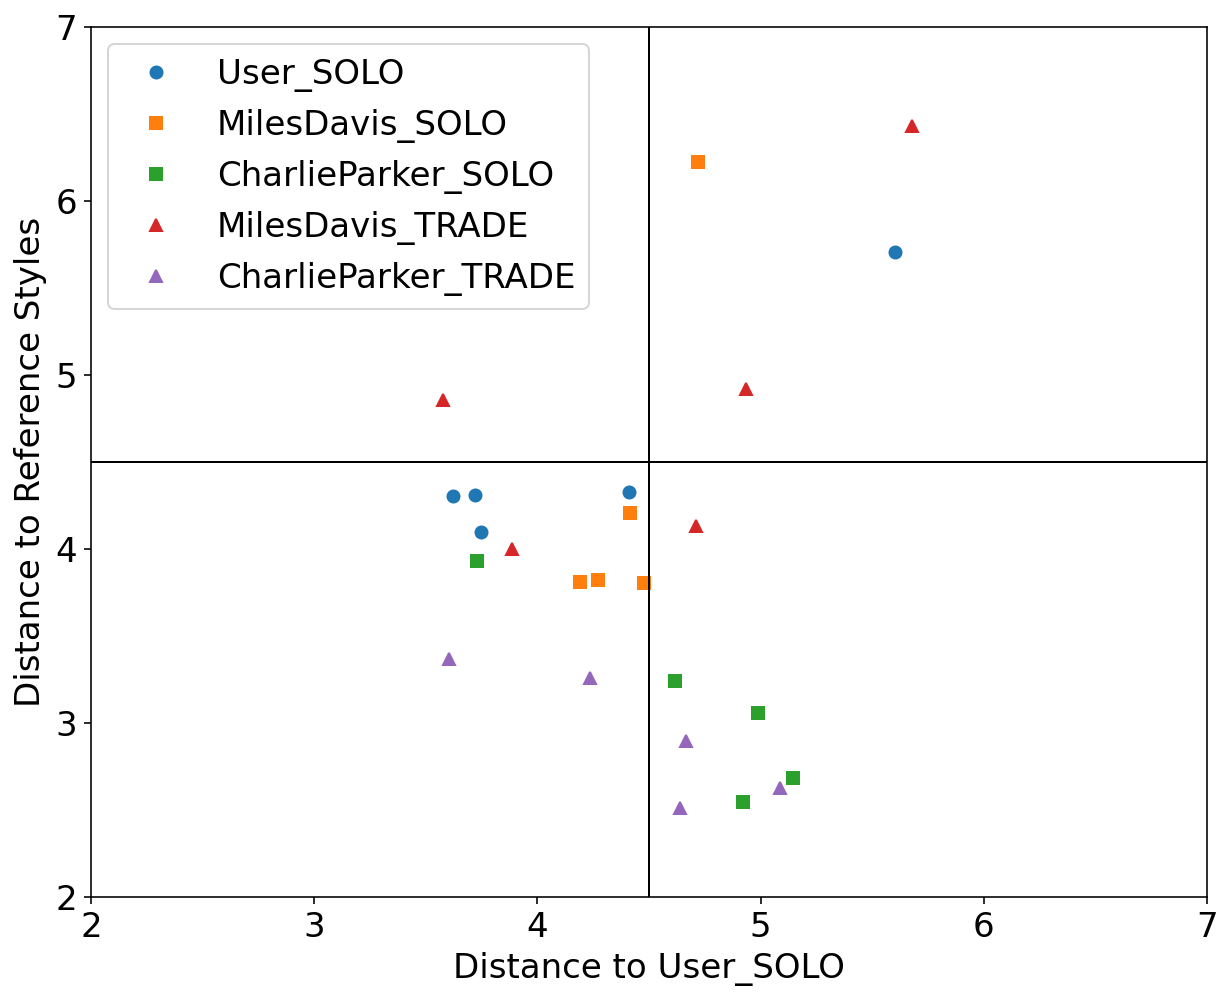

In [285]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(2, 7);
plt.ylim(2, 7);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])): 
        # print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(axis_X[keyname_i][i])
        current_Y_values.append(axis_Y[keyname_i][i])
    
    keyname_i = keyname_i.replace("CalebRascon", "User")
    keyname_i = keyname_i.replace("CORPUS", "SOLO")
    keyname_i = keyname_i.replace("GSOLO", "SOLO")
    keyname_i = keyname_i.replace("User_TRADE_Miles", "MilesDavis_TRADE")
    keyname_i = keyname_i.replace("User_TRADE_CharlieParker", "CharlieParker_TRADE")
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([4.5, 4.5], [2, 7], 'k-', lw=1)
plt.plot([2, 7], [4.5, 4.5], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("Distance to User_SOLO")
plt.ylabel("Distance to Reference Styles")

# Analysis 3 - 2D Plane For Comparison with SIAM

In [286]:
all_similarities_store = {}
with open('./CCEvaluation_groups_SIAM.json') as json_file:
    all_similarities_store = json.load(json_file)

### Axis Y values

In [287]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [288]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [289]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [290]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

Text(0, 0.5, 'Distance to Reference Styles')

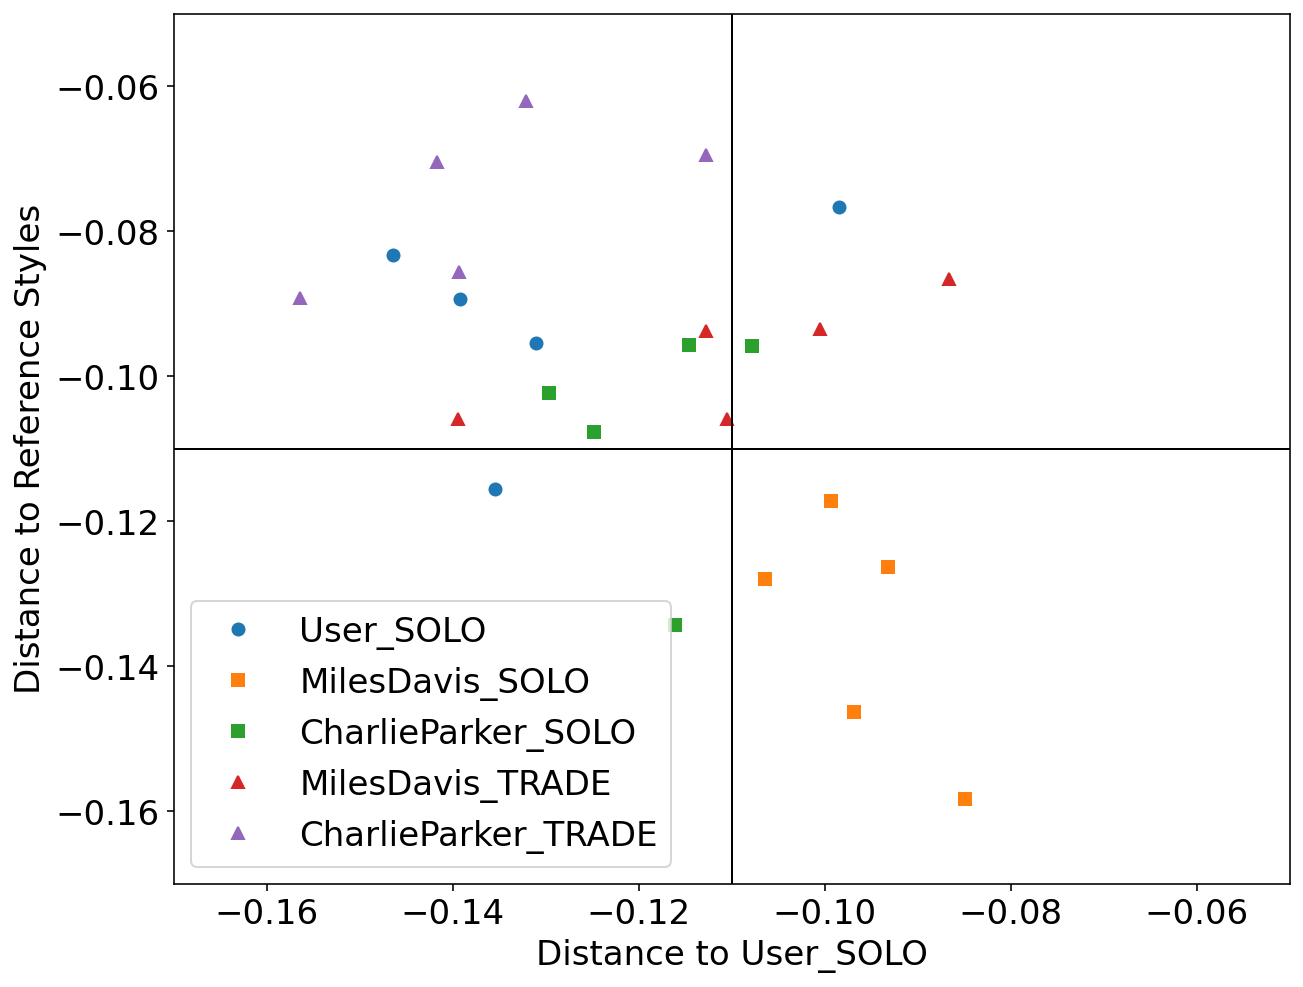

In [291]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(-0.17, -0.05);
plt.ylim(-0.17, -0.05);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])): 
        # print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(axis_X[keyname_i][i])
        current_Y_values.append(axis_Y[keyname_i][i])
    
    keyname_i = keyname_i.replace("CalebRascon", "User")
    keyname_i = keyname_i.replace("CORPUS", "SOLO")
    keyname_i = keyname_i.replace("GSOLO", "SOLO")
    keyname_i = keyname_i.replace("User_TRADE_Miles", "MilesDavis_TRADE")
    keyname_i = keyname_i.replace("User_TRADE_CharlieParker", "CharlieParker_TRADE")
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([-0.11, -0.11], [-0.17, -0.05], 'k-', lw=1)
plt.plot([-0.17, -0.05], [-0.11, -0.11], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("Distance to User_SOLO")
plt.ylabel("Distance to Reference Styles")

# Analysis 3 - 2D Plane For Comparison with BSPLINE

In [84]:
all_similarities_store = {}
with open('./CCEvaluation_groups_BSPLINE.json') as json_file:
    all_similarities_store = json.load(json_file)

### Axis Y values

In [85]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [86]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [87]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [88]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

Text(0, 0.5, 'Reference Artists Avg')

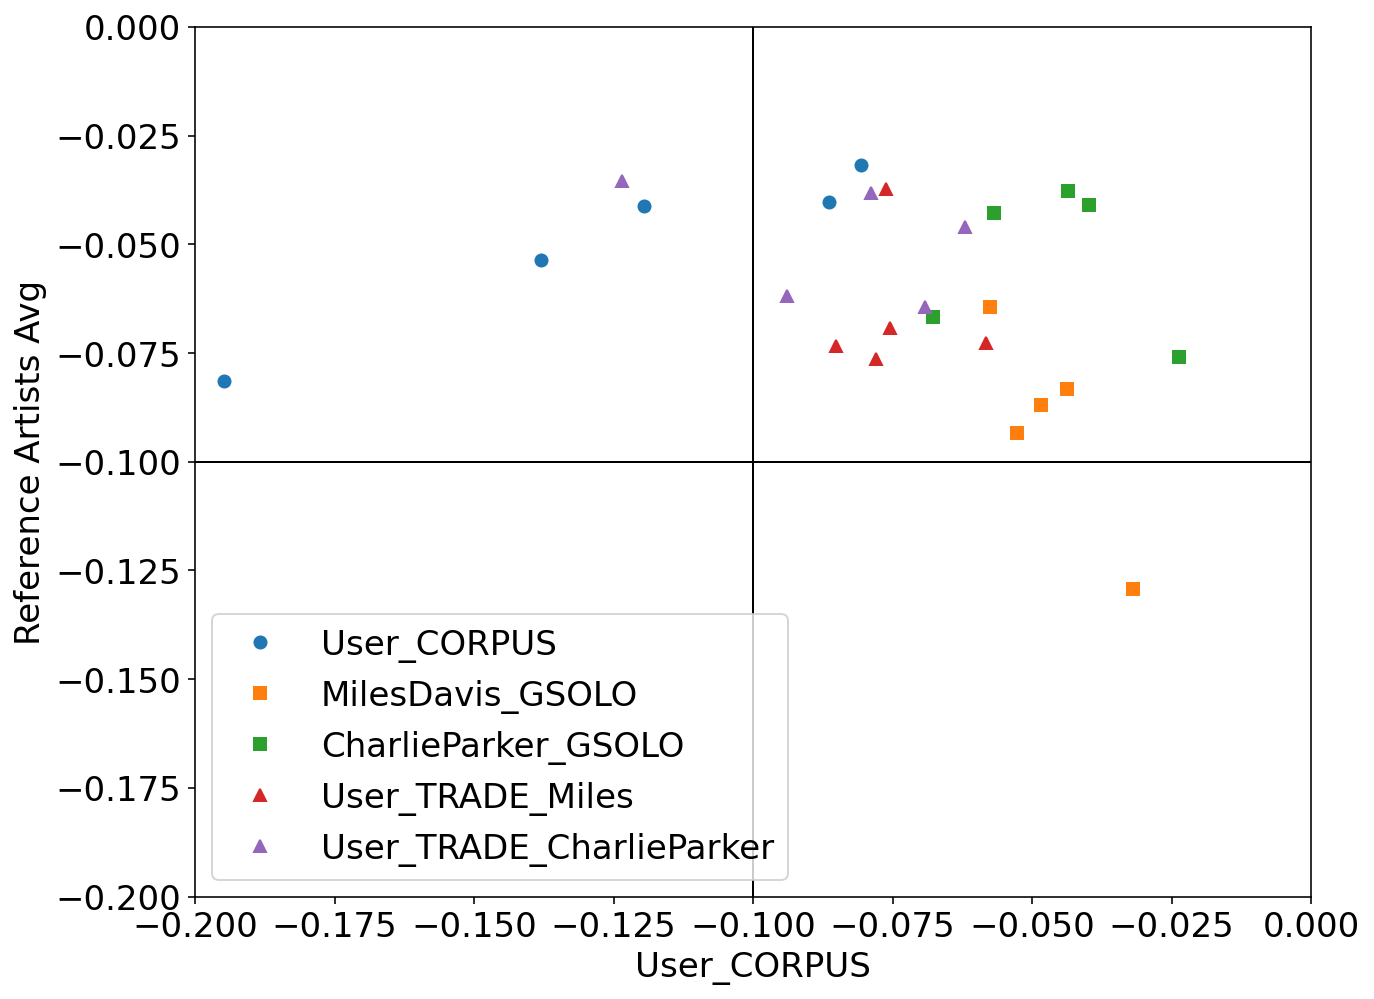

In [89]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(-0.2, 0.0);
plt.ylim(-0.2, 0.0);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])): 
        # print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(-axis_X[keyname_i][i])
        current_Y_values.append(-axis_Y[keyname_i][i])
    
    keyname_i = keyname_i.replace("CalebRascon", "User")
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([-0.1, -0.1], [-0.2, 0.0], 'k-', lw=1)
plt.plot([-0.2, 0.0], [-0.1, -0.1], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("User_CORPUS")
plt.ylabel("Reference Artists Avg")

# Analysis 3 - 2D Plane For Comparison with CORR

In [90]:
all_similarities_store = {}
with open('./CCEvaluation_groups_CORR.json') as json_file:
    all_similarities_store = json.load(json_file)

### Axis Y values

In [91]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [92]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [93]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [94]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

Text(0, 0.5, 'Reference Artists Avg')

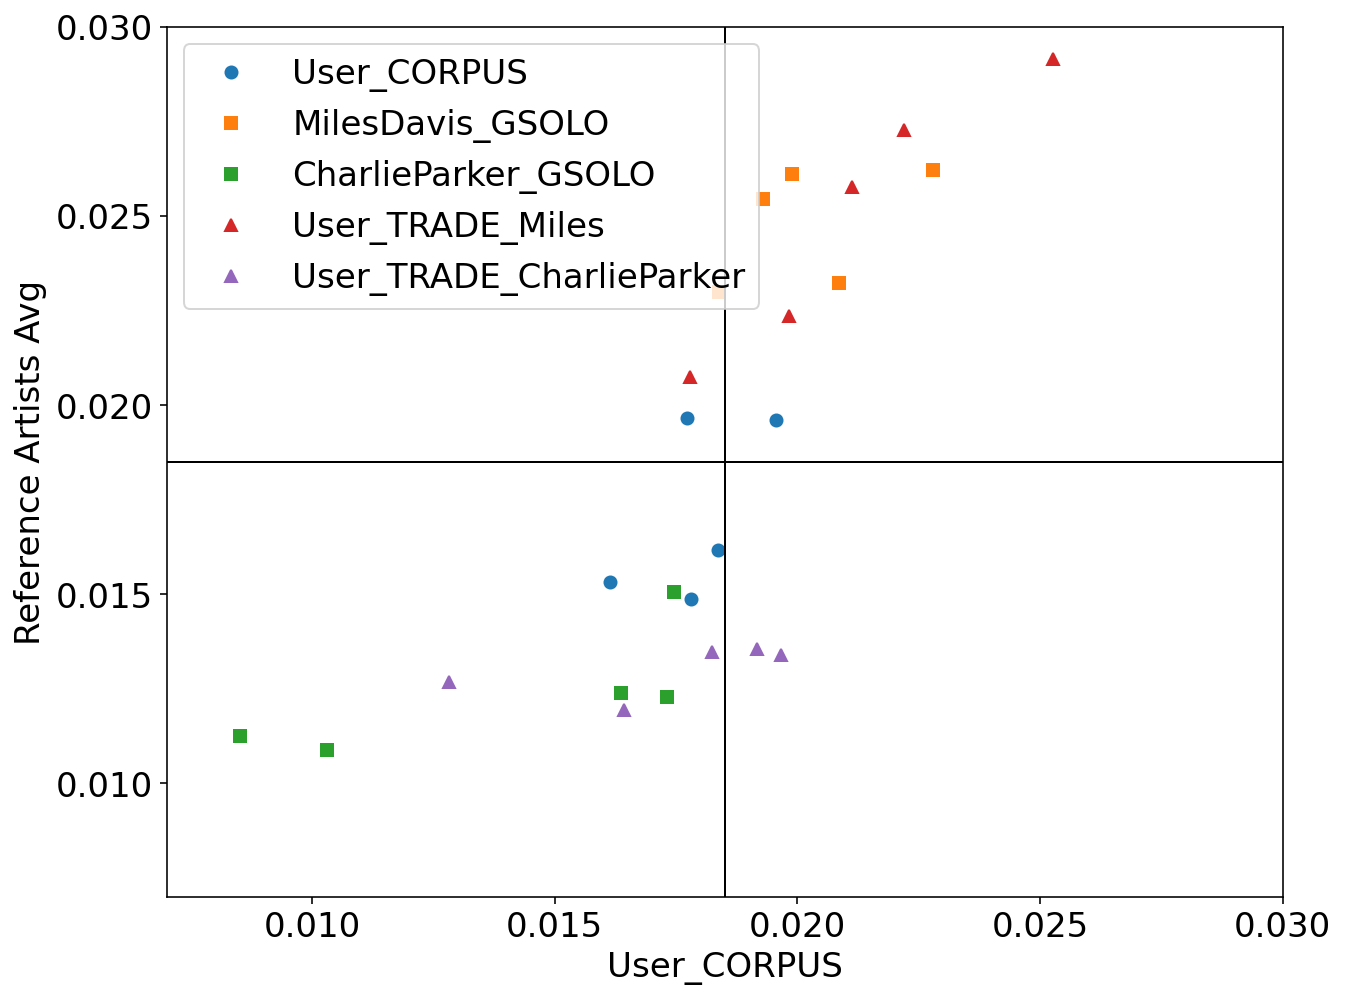

In [95]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(0.007, 0.03);
plt.ylim(0.007, 0.03);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])): 
        # print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(axis_X[keyname_i][i])
        current_Y_values.append(axis_Y[keyname_i][i])
    
    keyname_i = keyname_i.replace("CalebRascon", "User")
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([0.0185, 0.0185], [0.007, 0.03], 'k-', lw=1)
plt.plot([0.007, 0.03], [0.0185, 0.0185], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("User_CORPUS")
plt.ylabel("Reference Artists Avg")

# Analysis 3 - 2D Plane For Comparison with CBD

In [96]:
all_similarities_store = {}
with open('./CCEvaluation_groups_CBD.json') as json_file:
    all_similarities_store = json.load(json_file)

### Axis Y values

In [97]:
axis_Y = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    if (directory_A == "CalebRascon_CORPUS") or (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12") :
        continue
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
   
    if (directory_B not in axis_Y):
        axis_Y[directory_B] = []
        
    if (directory_B == "MilesDavis_GSOLO") or (directory_B == "CalebRascon_TRADE_Miles"):
        if (directory_A != "MilesDavis_GSOLO"):
            continue
    
    if (directory_B == "CharlieParker_GSOLO") or (directory_B == "CalebRascon_TRADE_CharlieParker"):
        if (directory_A != "CharlieParker_GSOLO"):
            continue
    print(directory_A + " , " + directory_B)
    
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_Y[directory_B].append(current_sim_df.mean())
    

MilesDavis_GSOLO , CalebRascon_CORPUS
MilesDavis_GSOLO , CalebRascon_GSOLO
MilesDavis_GSOLO , MilesDavis_GSOLO
MilesDavis_GSOLO , CalebRascon_TRADE_Caleb
MilesDavis_GSOLO , CalebRascon_TRADE_Miles
CharlieParker_GSOLO , CalebRascon_CORPUS
CharlieParker_GSOLO , CalebRascon_GSOLO
CharlieParker_GSOLO , CharlieParker_GSOLO
CharlieParker_GSOLO , CalebRascon_TRADE_Caleb
CharlieParker_GSOLO , CalebRascon_TRADE_CharlieParker


In [98]:
for keynameY_i in list(axis_Y.keys()):
    axis_Y[keynameY_i] = pd.DataFrame(axis_Y[keynameY_i]).mean()

### Axis X values

In [99]:
axis_X = {}
for keyname_i in list(all_similarities_store.keys()):
    directory_A = keyname_i.split(":")[0].split("/")[1] + "_" + keyname_i.split(":")[0].split("/")[2]
    directory_B = keyname_i.split(":")[1].split("/")[1] + "_" + keyname_i.split(":")[1].split("/")[2]
    
    # We skip the Axis X options
    # OPTION 1
    if not (directory_A == "CalebRascon_CORPUS"):
        continue
    
    # OPTION 2
    # if not (directory_A == "CalebRascon_MIDI_Grammar_SOLO_LEN12"):
    #     continue
    
    directory_A = replace_verbose_name(directory_A)
    directory_B = replace_verbose_name(directory_B)
    
    print(directory_A + " , " + directory_B)
    
    if (directory_B not in axis_X):
        axis_X[directory_B] = []
    
    current_sim_df = pd.DataFrame(all_similarities_store[keyname_i])
    axis_X[directory_B].append(current_sim_df.mean())
    

CalebRascon_CORPUS , CalebRascon_CORPUS
CalebRascon_CORPUS , CalebRascon_GSOLO
CalebRascon_CORPUS , MilesDavis_GSOLO
CalebRascon_CORPUS , CharlieParker_GSOLO
CalebRascon_CORPUS , CalebRascon_TRADE_Caleb
CalebRascon_CORPUS , CalebRascon_TRADE_Miles
CalebRascon_CORPUS , CalebRascon_TRADE_CharlieParker


In [100]:
for keynameX_i in list(axis_X.keys()):
    axis_X[keynameX_i] = pd.DataFrame(axis_X[keynameX_i]).mean()

### Coordinate representation

Text(0, 0.5, 'Reference Artists Avg')

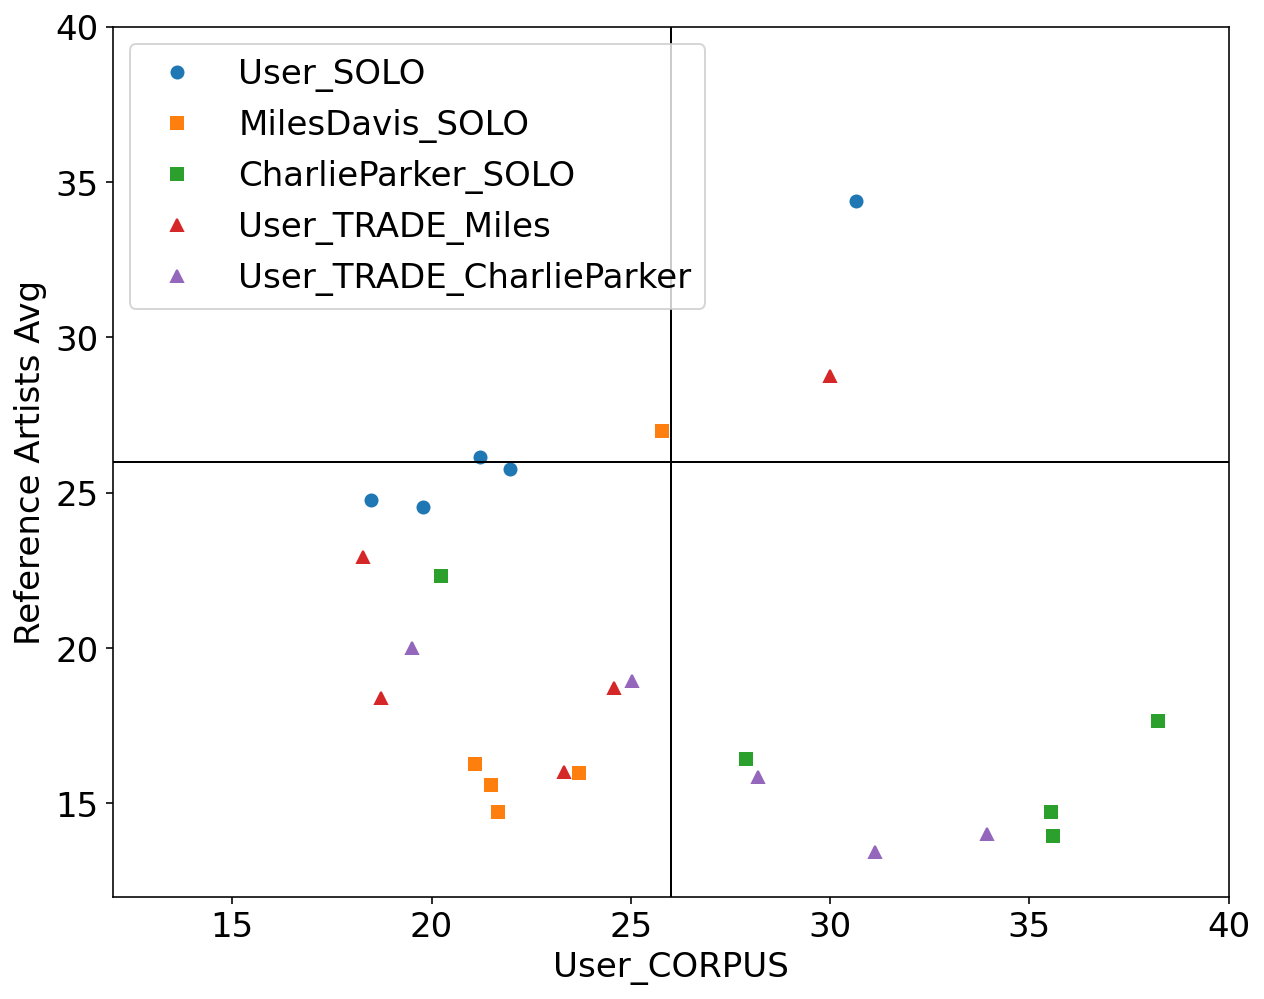

In [102]:
markers_plt = ['o', 's', 's', '^', '^', '^', '>', 's', 'd', ',']
# ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
marker_i = 0
plt.figure(figsize=(10,8))
plt.xlim(12, 40);
plt.ylim(12, 40);

for keyname_i in axis_X:
    current_X_values = []
    current_Y_values = []
    if ("CalebRascon_GSOLO" == keyname_i) or ("CalebRascon_TRADE_Caleb" == keyname_i) :
        continue
    for i in range(len(axis_X[keyname_i])): 
        # print(axis_X[keyname_i][i], axis_Y[keyname_i][i])
        current_X_values.append(axis_X[keyname_i][i])
        current_Y_values.append(axis_Y[keyname_i][i])
    
    keyname_i = keyname_i.replace("CalebRascon", "User")
    keyname_i = keyname_i.replace("CORPUS", "SOLO")
    keyname_i = keyname_i.replace("GSOLO", "SOLO")
    plt.plot(current_X_values, current_Y_values, markers_plt[marker_i], label=keyname_i)
    marker_i += 1

plt.plot([26, 26], [12, 40], 'k-', lw=1)
plt.plot([12, 40], [26, 26], 'k-', lw=1)
plt.legend(numpoints=1)
plt.xlabel("User_CORPUS")
plt.ylabel("Reference Artists Avg")